In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"


# Read the City and Ride Data
city_df = pd.read_csv("city_data.csv")
city_df.head()
ride_df = pd.read_csv('ride_data.csv')
ride_df.head()
# Combine the data into a single dataset
original_merge = pd.merge(city_df, ride_df, on='city')
original_merge
# Display the data table for preview
original_merge.drop_duplicates("city").head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
51,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
70,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
93,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354


In [2]:
#city_group = original_merge.groupby(['city'])
#city_group
#fare_group = city_group['fare'].mean()
#fare_group
#ride_count = city_group['ride_id'].count()
#ride_count
city_data_df = original_merge.groupby("city")
#count_df = city_group['type'].count()
#count_df
average_fare = city_data_df["fare"].mean()
ride_count = city_data_df['ride_id'].count()
#original_merge['city'].unique()
# count_driver = city_data_df['driver_count'].mean()
# sub_cat = original_merge['fare'].groupby([original_merge['type']]).mean()
# sub_cat

In [3]:
urban_df = original_merge[original_merge['type'] == 'Urban']['type'].count()
urban_df

1625

## Bubble Plot of Ride Sharing Data

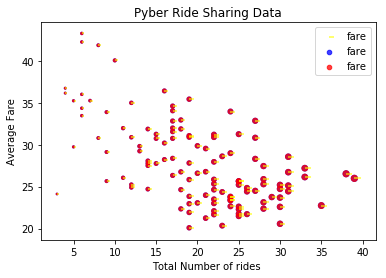

In [4]:
# Obtain the x and y coordinates for each of the three city types
x = ride_count
y = average_fare
# Build the scatter plots for each city types
suburban = plt.scatter(x,y, s=ride_count, marker="o", c='blue', alpha=0.75)
rural = plt.scatter(x,y, s=ride_count, marker='o', c="red", alpha=0.75)
city = plt.scatter(x,y, s=ride_count, marker=1, c='yellow', alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Total Number of rides ")
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data')
# Create a legend

# Obtain the x and y coordinates for each of the three city types
#databycity_df = combined_df.groupby(["type"],["city"])
#databycity_df = combined_df.groupby("type")
# databycity_df = combined_df.groupby("city")
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)
avgfare = city_data_df["fare"].mean()
#avgfare = databycity_df["fare"].sum() / databycity_df["city"].nunique()
ridecount = city_data_df["ride_id"].count()
drivercount = city_data_df["driver_count"].mean()*10
#each of the above defined separately for each city type?
#urban = databycity_df[databycity_df["type"]== "Urban"]
#uavgfare = databycity_df["fare"].mean()
#uridecount = databycity_df["ride_id"].count()
#udrivercount = databycity_df["driver_count"].mean()*10
#suburban = databycity_df[databycity_df["type"]== "Suburban"]
#savgfare = suburban["fare"].mean()
#sridecount = databycity_df["ride_id"].count()
#sdrivercount = databycity_df["driver_count"].mean()*10
#rural = databycity_df[databycity_df["type"]== "Rural"]
#ravgfare = rural["fare"].mean()
#rridecount = rural["ride_id"].count()
#rdrivercount = rural["driver_count"].mean()*10
#urban = databycity_df.loc["type"]
#suburban
#rural

# Build the scatter plots for each city types
#pyberplot = plt.scatter(ridecount, avgfare, marker="o", facecolors="red", edgecolors="black",
#            s=drivercount, alpha=0.75)
# urbanplt = plt.scatter(ridecount, avgfare, marker="o", facecolors="lightcoral", edgecolors="black",
#             s=drivercount, alpha=0.75, label ="Urban")
# suburbanplt = plt.scatter(ridecount, avgfare, marker="o", facecolors="lightskyblue", edgecolors="black",
#             s=drivercount, alpha=0.75, label ="Suburban")
# ruralplt = plt.scatter(ridecount, avgfare, marker="o", facecolors="gold", edgecolors="black",
#             s=drivercount, alpha=0.75, label ="Rural")
# Incorporate the other graph properties

# Create a legend
plt.legend(handles=[city, suburban, rural], loc="best")
# Incorporate a text label regarding circle size

# Save Figure

In [5]:
#index = pd.MultiIndex.city_group(city_group, names=('city', 'type'))
#jazz = city_group['type'].groupby([city_group['fare']]).mean()


In [6]:
# Show plot
plt.show()
plt.savefig("Scatter.png")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

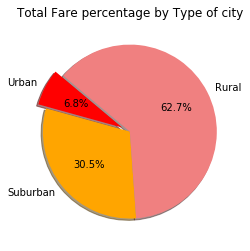

In [7]:
# Calculate Type Percents
type_df = original_merge.groupby('type')
count_df = type_df['fare'].count() / type_df['type'].count().sum()
count_df

fare_sum = type_df['fare'].sum()
# Build Pie Chart

driver_count_total = type_df['driver_count'].sum()
ride_id_total = type_df['ride_id'].count()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = count_df

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral",]



# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0,)
# Save Figure
fare_sum.plot(kind='pie', explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Total Fare percentage by Type of city")
plt.ylabel("")
plt.savefig("Fare_percentage.png")

## Total Rides by City Type

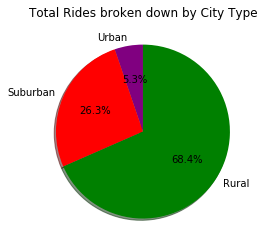

In [8]:
# Show Figure

# # Build Pie Chart
# #used this output as the sizes
# sub_cat = original_merge['fare'].groupby([original_merge['type']]).mean()
# sub_cat
# # Labels for the sections of our pie chart
# labels = ["Urban", "Suburban", "Rural"]

# # The values of each section of the pie chart
# sizes = [24.525772,30.970128, 34.623440 ]

# # The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral",]

# # Tells matplotlib to seperate the "Python" section from the others
# explode = (0.1, 0, 0,)
# # Save Figure
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)
# plt.show()

# driver_group = original_merge['driver_count'].groupby([original_merge['type']]).mean
# driver_group

# driver_perc = driver_group['type'].count() / driver_group['driver_count'].count().sum()
labels = original_merge['type'].unique()
# Build Pie Charts
# size = driver_perc
colors = ['purple', 'red', 'green']
# Save Figure
ride_id_total.plot(kind="pie", labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Total Rides broken down by City Type")
plt.ylabel("")
plt.savefig("Ride_percentage.png")

In [9]:

# # Calculate Ride Percents
# sub_cat = original_merge.groupby("type")
# sub_cat_perc = sub_cat['fare'].count() / sub_cat['type'].count().sum()
# # Build Pie Chart
# labels = original_merge['type'].unique()
# size = sub_cat_perc
# explode = (0.3, 0, 0,)
# colors = ['red', 'green', 'blue']
# # Save Figure['']
# plt.pie(size, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

In [10]:
# # Show Figure
# plt.show()

## Total Drivers by City Type

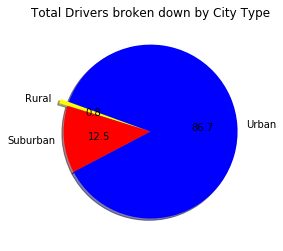

In [11]:
# Calculate Driver Percents



labels = original_merge['type'].unique()
# Build Pie Charts
colors = ['yellow', 'red', 'blue']
# Save Figure
driver_count_total.plot(kind="pie", autopct='%1.1f', explode=explode, colors=colors, startangle=160, shadow=True)

plt.title("Total Drivers broken down by City Type")
plt.ylabel("")
plt.savefig("Total_drivers.png")

In [12]:
# Show Figure
plt.show()